<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Gray-Scale-Images-(Single-Channel)" data-toc-modified-id="Gray-Scale-Images-(Single-Channel)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Gray-Scale Images (Single Channel)</a></span></li><li><span><a href="#RGB-Images" data-toc-modified-id="RGB-Images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>RGB Images</a></span></li></ul></div>

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Gray-Scale Images (Single Channel)

- A gray scale image of size Height x Width is an array(matrix) of size Height x Width
- Let's call this array A. Then $A[i,j]$ is a value between **0 (Black) and 255 (White)**

In [2]:
#If I have 4x4 gray-scale image, it looks like as follows.
# Each entry holds a "scalar"
A = np.random.randint(0,255,size=(4,4))
A

array([[178, 118,   6,  80],
       [ 89,  58,  52,  37],
       [153, 225, 147, 137],
       [142,   5, 172,  13]])

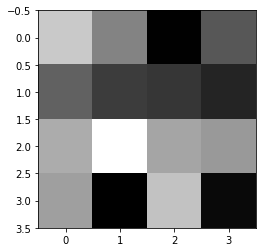

In [3]:
plt.imshow(A,cmap='gray')
plt.show()

In [4]:
print(A[2,0]) 
print(A[3,3]) 

153
13


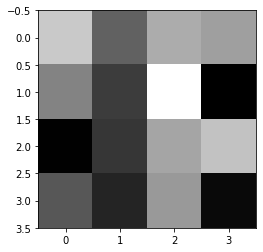

In [5]:
#switch rows and cols
At = A.transpose()
plt.imshow(At,cmap='gray')
plt.show()

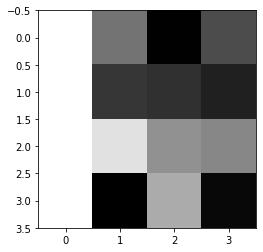

In [6]:
#Here is some trick
A[:,0] = 255; # all rows and first coloumns
A
plt.imshow(A,cmap='gray')
plt.show()

In [7]:
A_flat =  A.flatten()
print(A)
print(A_flat)

[[255 118   6  80]
 [255  58  52  37]
 [255 225 147 137]
 [255   5 172  13]]
[255 118   6  80 255  58  52  37 255 225 147 137 255   5 172  13]


In [8]:
A_flat.size

16

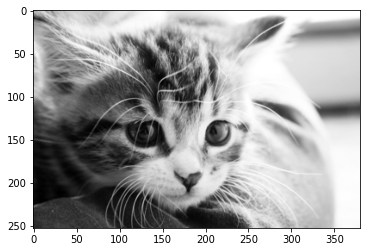

In [9]:
img = np.array(Image.open('figures/kitten.png'))
plt.imshow(img,cmap='gray')
plt.show()

In [10]:
print('height X width: ',img.shape)

height X width:  (253, 380)


In [11]:
#notice the black and white spots
print(img)

[[163 169 169 ... 255 255 255]
 [179 184 176 ... 255 255 255]
 [169 184 195 ... 255 255 255]
 ...
 [ 44  46  47 ... 248 248 248]
 [ 44  45  47 ... 248 247 247]
 [ 37  41  42 ... 249 247 247]]


In [12]:
#pixel value at [150,140], close to left eye.
print(img[150,140])

20


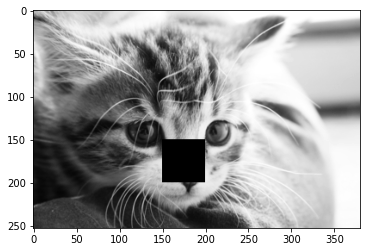

In [13]:
#what will happen?
imgnew = img.copy()
imgnew[150:200,150:200] = 0 # all pixels in these intervals...
plt.imshow(imgnew,cmap='gray')
plt.show()

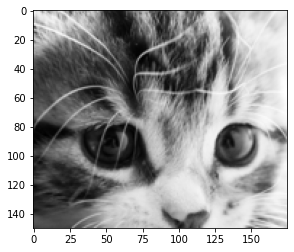

In [14]:
#trim the image
img2 = img[50:200,75:250]
plt.imshow(img2,cmap='gray')
plt.show()

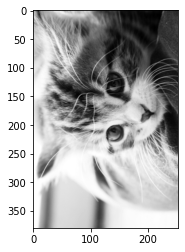

In [15]:
#what will happen?
imgnew = img.transpose()
plt.imshow(imgnew,cmap='gray')
plt.show()

## RGB Images 

In [16]:
#If I have 4x4 rgb image, it looks like
# read it like we have 4x4 matrix and we hold an array of size-3 in each entry
#A[0,0]--first row in the line a=nd etc
A = np.random.randint(0,255,size=(4,4,3))
A

array([[[151,  94, 111],
        [ 72,  42,  12],
        [128,  39, 199],
        [127, 165, 241]],

       [[  0, 109, 139],
        [ 96, 100,   1],
        [224, 232, 127],
        [156, 144, 182]],

       [[173,  59, 129],
        [108, 217, 135],
        [ 42,  16,  92],
        [104, 156,  94]],

       [[ 83, 130, 116],
        [106, 183, 129],
        [  1, 221,  98],
        [185, 173, 147]]])

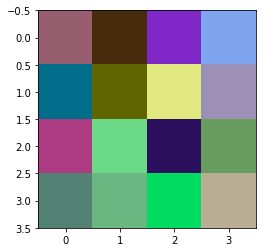

In [17]:
plt.imshow(A)
plt.show()

In [18]:
# R-G-B
print(A[1,0]) 

[  0 109 139]


In [19]:
# This system means we actually have around 16M colours...
256*256*256

16777216

In [20]:
print(A[3,2,0]) #red
print(A[3,2,1]) #green
print(A[3,2,2]) #blue

1
221
98


In [21]:
print(A[:,:,0]) #red channel
print('=================')
print(A[:,:,1]) #blue channel
print('=================')
print(A[:,:,2]) #green channel

[[151  72 128 127]
 [  0  96 224 156]
 [173 108  42 104]
 [ 83 106   1 185]]
[[ 94  42  39 165]
 [109 100 232 144]
 [ 59 217  16 156]
 [130 183 221 173]]
[[111  12 199 241]
 [139   1 127 182]
 [129 135  92  94]
 [116 129  98 147]]


In [22]:
(A.flatten()).size

48

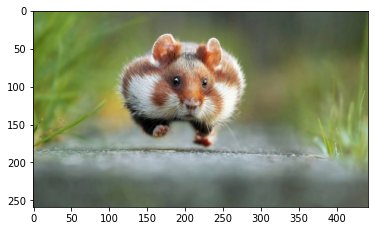

In [23]:
imgRGB = np.array(Image.open('figures/chipmonk.jpg'))
plt.imshow(imgRGB)
plt.show()

In [24]:
print('height X width X channel: ',imgRGB.shape)

height X width X channel:  (259, 442, 3)


In [25]:
print('Left-upper corner: ',imgRGB[0,0])    # must be more green here..
print('Center-ish: ',imgRGB[100,200]) # more red

Left-upper corner:  [101 130  63]
Center-ish:  [135  83  69]


In [26]:
print(imgRGB[100,200,0]) #red 
print(imgRGB[100,200,1]) #green
print(imgRGB[100,200,2]) #blue

135
83
69


In [27]:
#using the same idea we can return channels seperately
temp_red = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_red[:,:,0] = imgRGB[:,:,0]

temp_green = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_green[:,:,1] = imgRGB[:,:,1]

temp_blue = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_blue[:,:,2] = imgRGB[:,:,2]

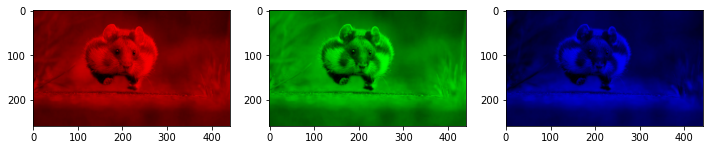

In [28]:
fig,ax =  plt.subplots(1,3,figsize=(12,5))
ax[0].imshow(temp_red)
ax[1].imshow(temp_green)
ax[2].imshow(temp_blue)
plt.show()